In [3]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from bnn import DNGO
from bnn.util.normalization import zero_mean_unit_var_normalization, zero_mean_unit_var_unnormalization

%matplotlib inline

plt.rc('text', usetex=True)
plt.rc('font', size=15.0, family='serif')
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]

In [4]:
def f(x):
    return np.sinc(x * 10 - 5)

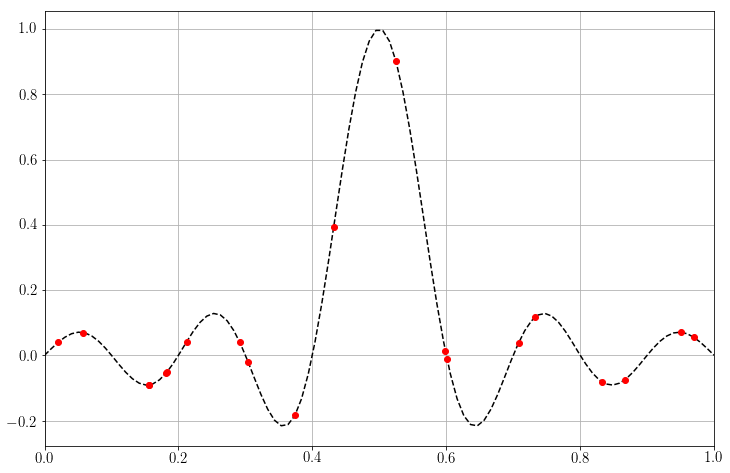

In [5]:
rng = np.random.RandomState(42)

x = rng.rand(20)
y = f(x)

grid = np.linspace(0, 1, 100)
fvals = f(grid)

plt.plot(grid, fvals, "k--")
plt.plot(x, y, "ro")
plt.grid()
plt.xlim(0, 1)

plt.show()

In [6]:
model = DNGO(do_mcmc=False)
model.train(x[:, None], y, do_optimize=True)

Optimization terminated successfully.
         Current function value: 10.921821
         Iterations: 71
         Function evaluations: 166


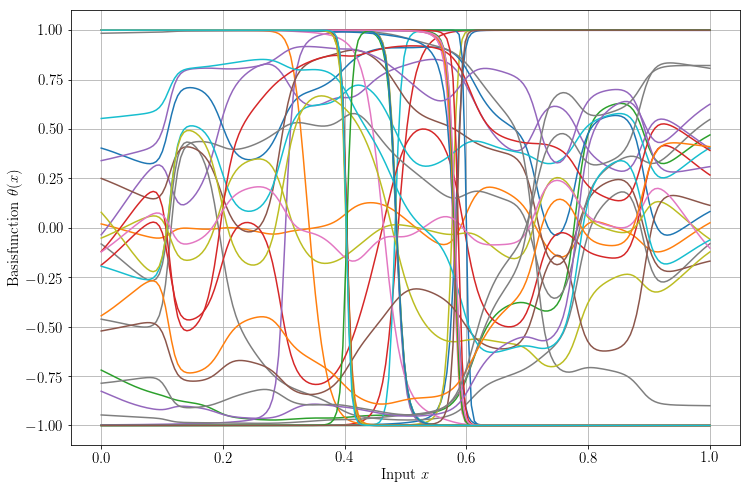

In [7]:
x_test = np.linspace(0, 1, 200)
x_test_norm = zero_mean_unit_var_normalization(x_test[:, None], model.X_mean, model.X_std)[0]

# Get basis functions from the network
basis_funcs = model.network.basis_funcs(torch.Tensor(x_test_norm)).data.numpy()

for i in range(min(50, model.n_units_3)):
    plt.plot(x_test, basis_funcs[:, i])
plt.grid()
plt.xlabel(r"Input $x$")
plt.ylabel(r"Basisfunction $\theta(x)$")
plt.show()

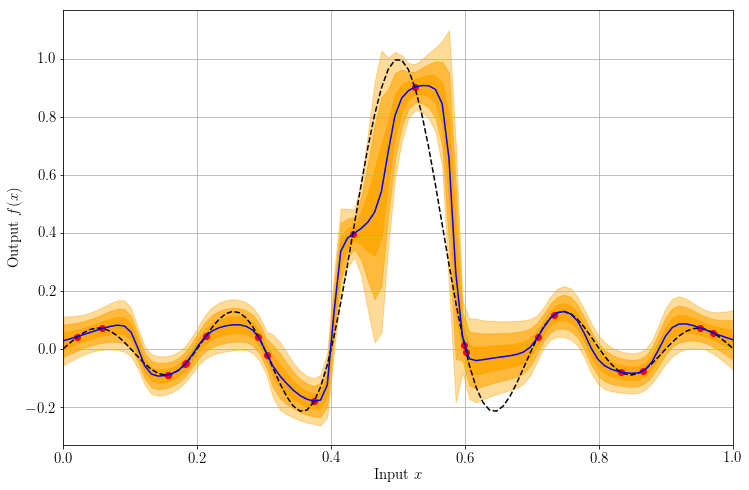

In [8]:
m, v = model.predict(grid[:, None])

plt.plot(x, y, "ro")
plt.grid()
plt.plot(grid, fvals, "k--")
plt.plot(grid, m, "blue")
plt.fill_between(grid, m + np.sqrt(v), m - np.sqrt(v), color="orange", alpha=0.8)
plt.fill_between(grid, m + 2 * np.sqrt(v), m - 2 * np.sqrt(v), color="orange", alpha=0.6)
plt.fill_between(grid, m + 3 * np.sqrt(v), m - 3 * np.sqrt(v), color="orange", alpha=0.4)
plt.xlim(0, 1)
plt.xlabel(r"Input $x$")
plt.ylabel(r"Output $f(x)$")
plt.show()